`mamba update cmip6_preprocessing -y` in terminal

In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
#import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")
from cmip6_preprocessing.postprocessing import combine_datasets

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

Here's the subset of models, using historical experients with native gridding with Omon freq<br>
['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5','CESM2-WACCM-FV2', 'CESM2-FV2']

## Salinity

In [4]:
cat_so = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'so', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_so_og = cat_so.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_so = combine_datasets(
    dd_so_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


`from cmip6_preprocessing.postprocessing import combine_datasets`

`def pick_first_member(ds_list, **kwargs):`
    `return ds_list[0]`

`dd_so_new = combine_datasets(`
    `dd_so,`
    `pick_first_member,`
   ` match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])`


In [6]:
for name, ds in dd_so.items():
    print(ds.attrs['source_id']+ds.attrs['variant_label'])

CanESM5r3i1p1f1
CNRM-ESM2-1r3i1p1f2
MPI-ESM1-2-LRr9i1p1f1
GISS-E2-1-Gr6i1p1f1
IPSL-CM6A-LRr28i1p1f1
MIROC-ES2Lr7i1p1f2
MPI-ESM1-2-HRr3i1p1f1
ACCESS-ESM1-5r5i1p1f1
UKESM1-0-LLr6i1p1f3
CanESM5-CanOEr3i1p2f1
CESM2r2i1p1f1
MPI-ESM-1-2-HAMr2i1p1f1
CESM2-WACCM-FV2r1i1p1f1
CESM2-FV2r1i1p1f1
CESM2-WACCMr2i1p1f1
GISS-E2-1-G-CCr1i1p1f1


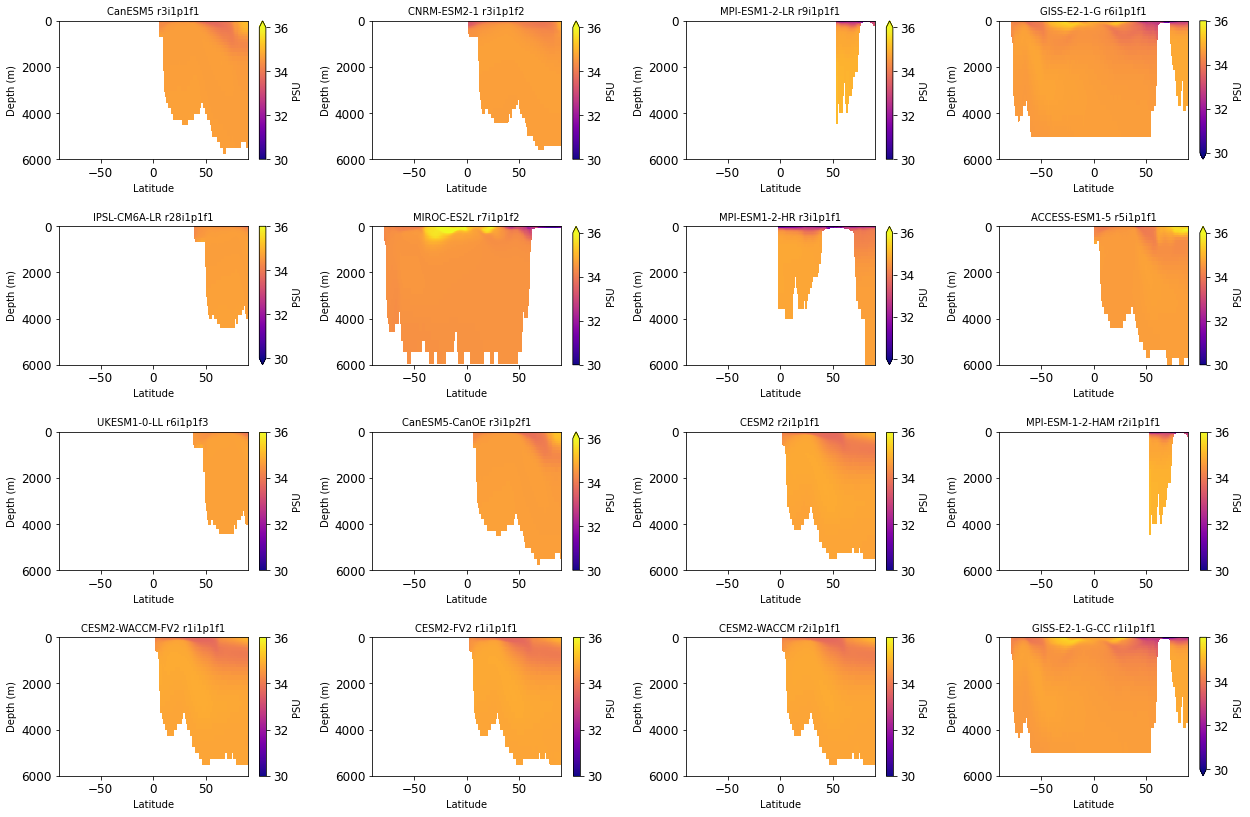

In [8]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_so, axarr_so = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_so.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_so.items():
#     print(ds)
    ax = axarr_so.flat[ax_idx]
    so_section = ds.so.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds.attrs['source_id']+ ' '+ds.attrs['variant_label'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
    ax.set_xlim([-90, 90])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

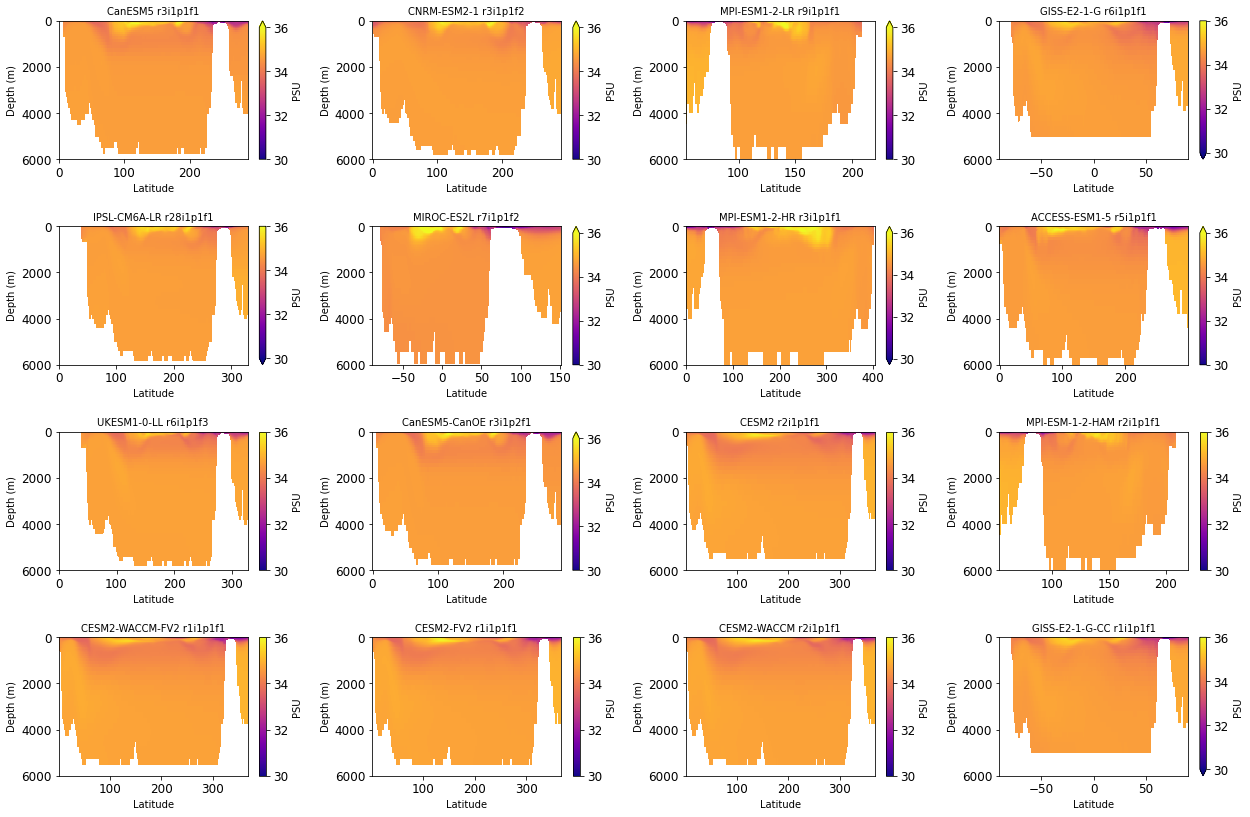

In [9]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_so2, axarr_so2 = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_so2.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_so.items():
#     print(ds)
    ax = axarr_so2.flat[ax_idx]
    so_section2 = ds.so.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section2.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds.attrs['source_id']+ ' '+ds.attrs['variant_label'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
    #ax.set_xlim([-90, 90])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Thetao

In [5]:
cat_thetao = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'thetao', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_thetao_og = cat_thetao.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_thetao = combine_datasets(
    dd_thetao_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2-WACCM-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-WACCM-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detect

IndexError: index 16 is out of bounds for axis 0 with size 16

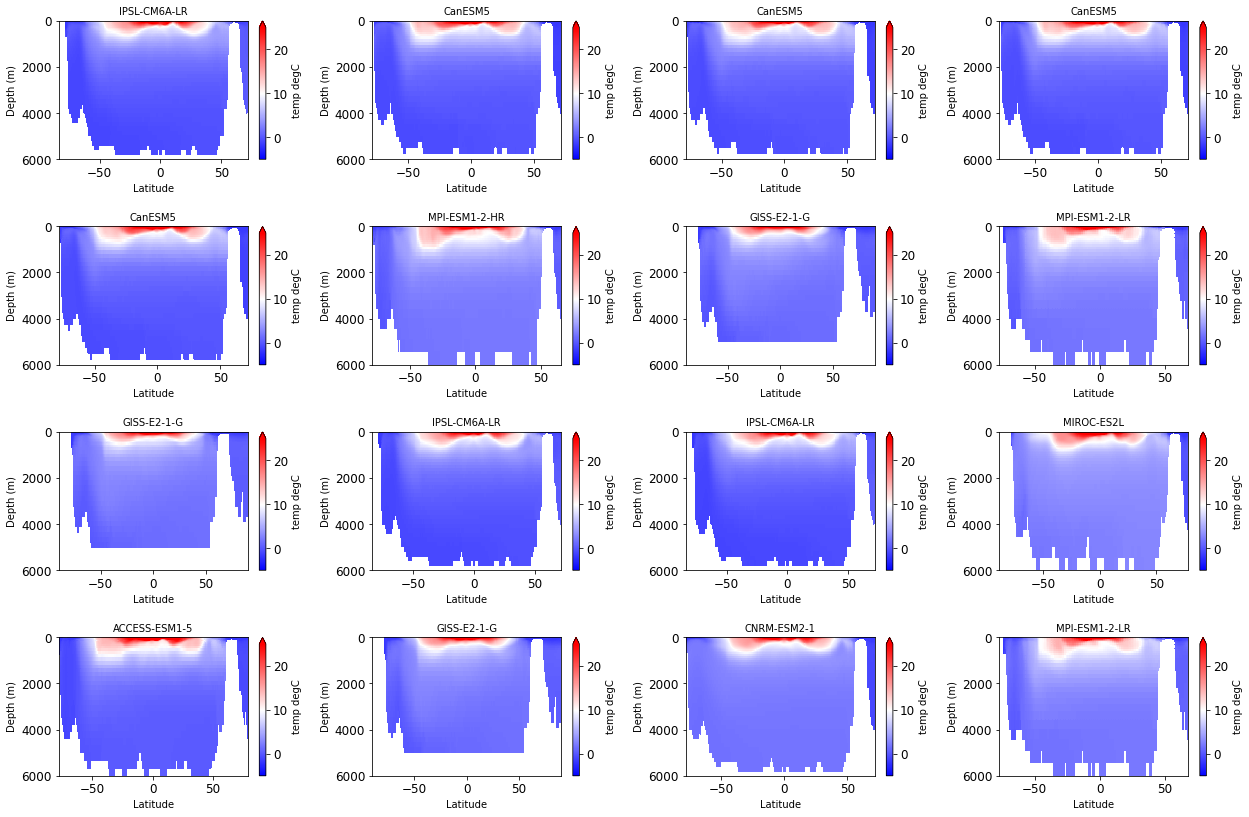

In [20]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_thetao, axarr_thetao = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_thetao.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_thetao.items():
#     print(ds)
    ax = axarr_thetao.flat[ax_idx]
    thetao_section = ds.thetao.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = thetao_section.plot(x='y', y='lev', yincrease=False, cmap = 'bwr', vmin = -5, vmax = 25, ax = ax, cbar_kwargs={'label':'temp degC'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Dissic

In [6]:
cat_dissic = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'dissic', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_dissic_og = cat_dissic.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_dissic = combine_datasets(
    dd_dissic_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`


MIROC-ES2L: No units found
CESM2-WACCM-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-WACCM-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-WACCM-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordin

IndexError: index 16 is out of bounds for axis 0 with size 16

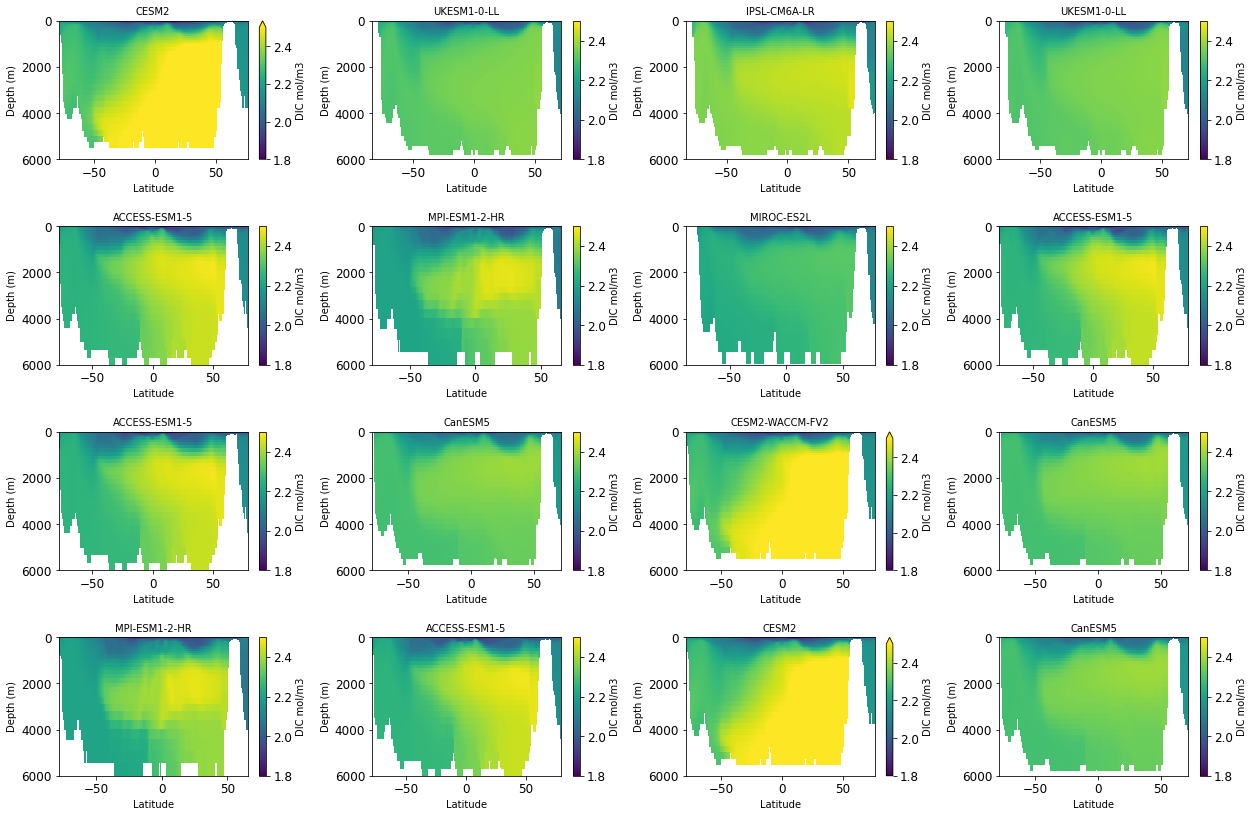

In [13]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_dissic, axarr_dissic = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_dissic.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_dissic.items():
#     print(ds)
    ax = axarr_dissic.flat[ax_idx]
    dissic_section = ds.dissic.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = dissic_section.plot(x='y', y='lev', yincrease=False, vmin = 1.8, vmax = 2.5, ax = ax, cbar_kwargs={'label':'DIC mol/m3'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Talk

In [15]:
cat_talk = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'talk', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_talk_og = cat_talk.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_talk = combine_datasets(
    dd_talk_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
MIROC-ES2L: No units found
CESM2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-FV2: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2-WACCM: Unexpected unit (centimeters) for coordinate `lev` detected.
	 Converted to `m`
CESM2: Unexp

IndexError: index 16 is out of bounds for axis 0 with size 16

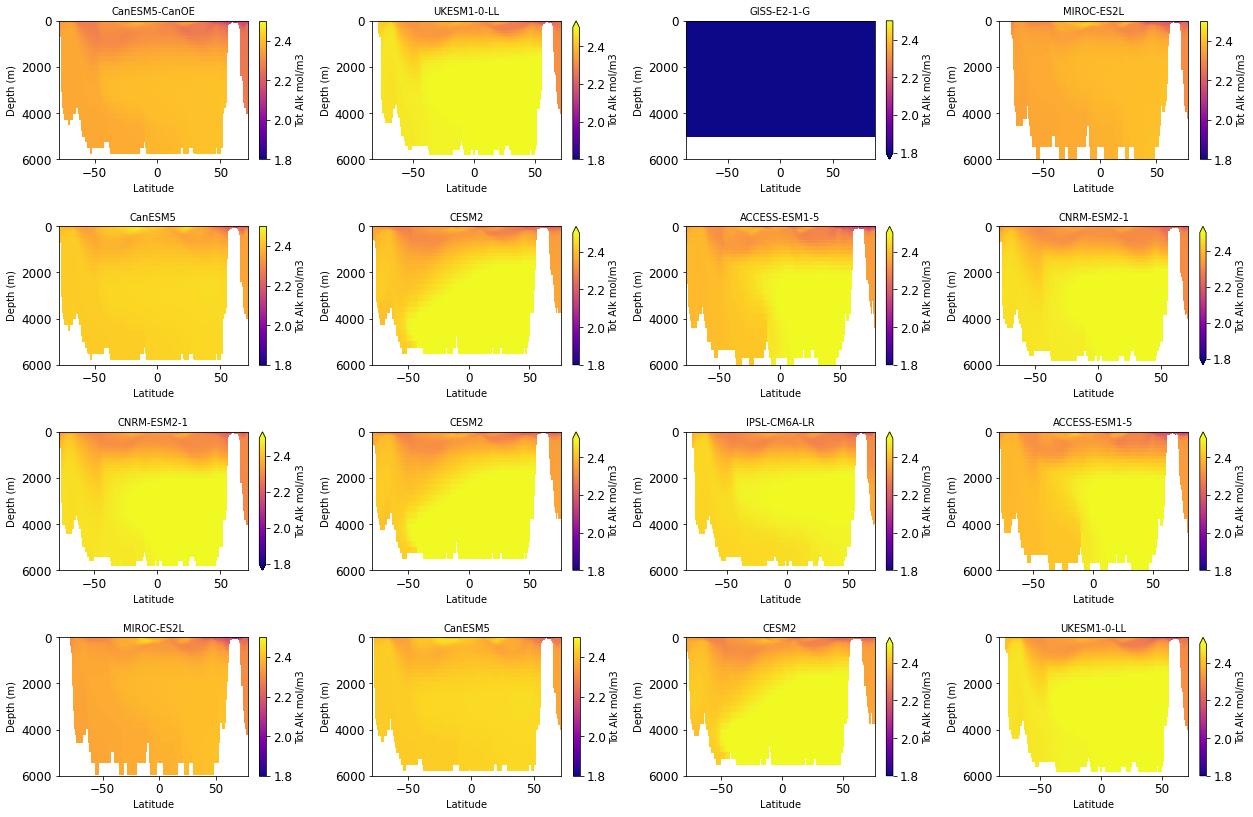

In [17]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_talk, axarr_talk = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_talk.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_talk.items():
#     print(ds)
    ax = axarr_talk.flat[ax_idx]
    talk_section = ds.talk.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = talk_section.plot(x='y', y='lev', yincrease=False, vmin = 1.8, vmax = 2.5, cmap = 'plasma', ax = ax, cbar_kwargs={'label':'Tot Alk mol/m3'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one